In [1]:
import numpy as np
import matplotlib.pylab as plt
import blimpy as bl
%matplotlib inline

In [2]:
from typing import List, Tuple

from astropy.time import Time
from astropy import units as u

In [3]:
import qrcode
from PIL import Image

In [4]:
# MAX_IMSHOW_POINTS   = (8192, 4096)           # Max number of points in imshow plot


# def plot_waterfall(fil, f_start=None, f_stop=None, if_id=0, 
#                    logged=True, cb=False, freq_label=False, MJD_time=False, **kwargs):
#     """ Plot waterfall of data
#     Args:
#         f_start (float): start frequency, in MHz
#         f_stop (float): stop frequency, in MHz
#         logged (bool): Plot in linear (False) or dB units (True),
#         cb (bool): for plotting the colorbar
#         kwargs: keyword args to be passed to matplotlib imshow()
#     """


#     plt.rc('font', size=12)

#     plot_f, plot_data = fil.grab_data(f_start, f_stop, if_id)

#     # Make sure waterfall plot is under 4k*4k
#     dec_fac_x, dec_fac_y = 1, 1
#     if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
#         dec_fac_x = plot_data.shape[0] / MAX_IMSHOW_POINTS[0]

#     if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
#         dec_fac_y =  plot_data.shape[1] /  MAX_IMSHOW_POINTS[1]

#     #print(dec_fac_x)
        
#     plot_data = bl.utils.rebin(plot_data, int(dec_fac_x), int(dec_fac_y))
    
#     plot_data = np.fliplr(plot_data)
#     plot_f = np.flipud(plot_f)

#     if MJD_time:
#         extent=(plot_f[0], plot_f[-1], fil.timestamps[-1], fil.timestamps[0])
#     else:
#         extent=(plot_f[0], plot_f[-1], (fil.timestamps[-1]-fil.timestamps[0])*24.*60.*60, 0.0)

#     this_plot = plt.imshow(plot_data,
#         aspect='auto',
#         rasterized=True,
#         interpolation='nearest',
#         extent=extent,
#         cmap='hot',
#         **kwargs
#     )
#     if cb:
#         plt.colorbar()

#     if freq_label:
#         plt.xlabel("Frequency (Hz)")
#     if MJD_time:
#         plt.ylabel("Time (MJD)")
#     else:
#         plt.ylabel("Time (s)")

# #    print('this is plot_data:', plot_data)
# #    print('this is plot_data\'s shape:', plot_data.shape)
# #    print('this is plot_f:', plot_f)
# #    print('this is plot_f\'s shape', plot_f.shape)
    
#     return this_plot

# def make_waterfall_plots(filenames_list, target, f_start, f_stop, ion=False, correction_in=0, 
#                          line1=None, line2=None, **kwargs):
#     ''' Makes waterfall plots per group of ON-OFF pairs (up to 6 plots.)
#     '''

#     plt.rc('font', size=12)

#     if ion:
#         plt.ion()

#     n_plots = len(filenames_list)
#     fig = plt.subplots(n_plots, sharex=True, sharey=True)
# #    fig = plt.subplots(n_plots, sharex=True, sharey=True, figsize=(10, 2*n_plots))
# #    fig = plt.subplots(1, 2, 1, sharex=True, sharey=True)

#     fil = bl.Waterfall(filenames_list[0], f_start=f_start, f_stop=f_stop)
    
#     A1_avg = np.median(fil.data)
#     A1_max = fil.data.max()
#     A1_std = np.std(fil.data)

#     labeling = ['A','B','A','C','A','D']

#     delta_f = np.abs(f_start-f_stop)
#     mid_f = np.abs(f_start+f_stop)/2.
    
#     #Adjust the incorrect header data
#     correction = mid_f - correction_in
#     mid_f_text = mid_f - correction

#     for i,filename in enumerate(filenames_list):
#         plt.subplot(n_plots, 2, (2 * i) + 1)

#         fil = bl.Waterfall(filename, f_start=f_start, f_stop=f_stop)

#         this_plot = plot_waterfall(fil,f_start=f_start, f_stop=f_stop,
#                                    vmin=A1_avg-A1_std*0,vmax=A1_avg+5.*A1_std,**kwargs)
        
#         if line1 != None:
#             plt.axvline(x=line1, color = 'white', ls='--')
#         if line2 != None:
#             plt.axvline(x=line2, color = 'white', ls='--')

#         if i == 0:
#             plt.title('Waterfall')

#         if i < len(filenames_list)-1:
#             plt.xticks(np.arange(f_start, f_stop, delta_f/4.), ['','','',''])

#     #Some plot formatting.
#     ax = plt.gca()
#     #ax.invert_xaxis()
#     ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
#     if target == 'HIP7981':
#         #f_start -= 0.3
#         #f_stop  += 0.3
#         factor = 1e3
#         units = 'kHz'
#     else:
#         factor = 1e6
#         units = 'Hz'
    
#     plt.xticks(np.arange(f_start, f_stop + 0.1 * delta_f/4, delta_f/4),
#                [round(loc_freq) for loc_freq in np.arange(
#                    (f_start-mid_f), (f_stop+0.1*delta_f/4-mid_f), delta_f/4)*factor])
#     plt.xlabel("Relative frequency in %s from %f MHz"%(units, mid_f))
    

#     #to plot color bar. for now.
# #    cax = fig[0].add_axes([0.9, 0.12, 0.03, 0.75])
# #    fig[0].colorbar(this_plot,cax=cax,label='Power (Arbitrary Units)')

#     # Fine-tune figure; make subplots close to each other and hide x ticks for
#     # all but bottom plot.
# #    plt.subplots_adjust(hspace=0,wspace=0)

In [5]:
grid = plt.GridSpec(12, 6, wspace=1, hspace=0.1)

In [6]:
MAX_IMSHOW_POINTS   = (8192, 4096 / 8)           # Max number of points in imshow plot


def plot_waterfall(fil, f_start=None, f_stop=None, if_id=0, 
                   logged=True, cb=False, freq_label=False, MJD_time=False, **kwargs):
    """ Plot waterfall of data
    Args:
        f_start (float): start frequency, in MHz
        f_stop (float): stop frequency, in MHz
        logged (bool): Plot in linear (False) or dB units (True),
        cb (bool): for plotting the colorbar
        kwargs: keyword args to be passed to matplotlib imshow()
    """


    plt.rc('font', size=12)

    plot_f, plot_data = fil.grab_data(f_start, f_stop, if_id)

    # Make sure waterfall plot is under 4k*4k
    dec_fac_x, dec_fac_y = 1, 1
    if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = plot_data.shape[0] / MAX_IMSHOW_POINTS[0]

    if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y =  plot_data.shape[1] /  MAX_IMSHOW_POINTS[1]

    #print(dec_fac_x)
        
    plot_data = bl.utils.rebin(plot_data, int(dec_fac_x), int(dec_fac_y))
    
    plot_data = np.fliplr(plot_data)
    plot_f = np.flipud(plot_f)

    if MJD_time:
        extent=(plot_f[0], plot_f[-1], fil.timestamps[-1], fil.timestamps[0])
    else:
        extent=(plot_f[0], plot_f[-1], (fil.timestamps[-1]-fil.timestamps[0])*24.*60.*60, 0.0)

    this_plot = plt.imshow(plot_data,
        aspect='auto',
        rasterized=True,
        interpolation='nearest',
        extent=extent,
        cmap='hot',
        **kwargs
    )
    if cb:
        plt.colorbar()

    if freq_label:
        plt.xlabel("Frequency (Hz)", size=12)
    if MJD_time:
        plt.ylabel("Time (MJD)", size=12)
    else:
        plt.ylabel("Time (s)", size=12)


#    print('this is plot_data:', plot_data)
#    print('this is plot_data\'s shape:', plot_data.shape)
#    print('this is plot_f:', plot_f)
#    print('this is plot_f\'s shape', plot_f.shape)
    
    return this_plot

def make_waterfall_plots(filenames_list, target, f_start, f_stop, ion=False, correction_in=0, 
                         line1=None, line2=None, **kwargs):
    ''' Makes waterfall plots per group of ON-OFF pairs (up to 6 plots.)
    '''

    plt.rc('font', size=12)

    if ion:
        plt.ion()

#    n_plots = len(filenames_list)
#    fig = plt.subplots(n_plots, sharex=True, sharey=True)
#    fig = plt.subplots(n_plots, sharex=True, sharey=True, figsize=(10, 2*n_plots))
#    fig = plt.subplots(1, 2, 1, sharex=True, sharey=True)

    fil = bl.Waterfall(filenames_list[0], f_start=f_start, f_stop=f_stop)
    
    A1_avg = np.median(fil.data)
    A1_max = fil.data.max()
    A1_std = np.std(fil.data)

    labeling = ['A','B','A','C','A','D']

    delta_f = np.abs(f_start-f_stop)
    mid_f = np.abs(f_start+f_stop)/2.
    
    #Adjust the incorrect header data
    correction = mid_f - correction_in
    mid_f_text = mid_f - correction

    for i,filename in enumerate(filenames_list):
        plt.subplot(grid[i + 6, :])

        fil = bl.Waterfall(filename, f_start=f_start, f_stop=f_stop)

        this_plot = plot_waterfall(fil,f_start=f_start, f_stop=f_stop,
                                   vmin=A1_avg-A1_std*0,vmax=A1_avg+5.*A1_std,**kwargs)
        
        if line1 != None:
            plt.axvline(x=line1, color = 'white', ls='--')
        if line2 != None:
            plt.axvline(x=line2, color = 'white', ls='--')

        if i == 0:
            plt.title('Waterfall plot', size=13.5)

        if i < len(filenames_list)-1:
            plt.xticks(np.arange(f_start, f_stop, delta_f/4.), ['','','',''])

    #Some plot formatting.
    ax = plt.gca()
    #ax.invert_xaxis()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
    if target == 'HIP7981':
        #f_start -= 0.3
        #f_stop  += 0.3
        factor = 1e3
        units = 'kHz'
    else:
        factor = 1e6
        units = 'Hz'
    
    plt.xticks(np.arange(f_start, f_stop + 0.1 * delta_f/4, delta_f/4),
               [round(loc_freq) for loc_freq in np.arange(
                   (f_start-mid_f), (f_stop+0.1*delta_f/4-mid_f), delta_f/4)*factor])
    plt.xlabel("Relative frequency in %s from %f MHz"%(units, mid_f), size=12)
    

    #to plot color bar. for now.
#     fig = plt.subplots(6, sharex=True, sharey=True)
#     cax = fig[0].add_axes([0.9, 0.12, 0.03, 0.75])
#     fig[0].colorbar(this_plot,cax=cax,label='Power (Arbitrary Units)')

    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
#    plt.subplots_adjust(hspace=0,wspace=0)

In [7]:
def make_waterfall_plots_full(filenames_list, target, f_start, f_stop, ion=False, correction_in=0, 
                              line1=None, line2=None, **kwargs):
    ''' Makes waterfall plots per group of ON-OFF pairs (up to 6 plots.)
    '''

    plt.rc('font', size=12)

    if ion:
        plt.ion()

    n_plots = len(filenames_list)
#    fig = plt.subplots(n_plots, sharex=True, sharey=True)
#    fig = plt.subplots(n_plots, sharex=True, sharey=True, figsize=(10, 2*n_plots))
#    fig = plt.subplots(1, 2, 1, sharex=True, sharey=True)

    fil = bl.Waterfall(filenames_list[0], f_start=f_start, f_stop=f_stop)
    
    A1_avg = np.median(fil.data)
    A1_max = fil.data.max()
    A1_std = np.std(fil.data)

    labeling = ['A','B','A','C','A','D']

    delta_f = np.abs(f_start-f_stop)
    mid_f = np.abs(f_start+f_stop)/2.
    
    #Adjust the incorrect header data
    correction = mid_f - correction_in
    mid_f_text = mid_f - correction

    for i,filename in enumerate(filenames_list):
        plt.subplot(n_plots, 1, i + 1)

        fil = bl.Waterfall(filename, f_start=f_start, f_stop=f_stop)

        this_plot = plot_waterfall(fil,f_start=f_start, f_stop=f_stop,
                                   vmin=A1_avg-A1_std*0,vmax=A1_avg+5.*A1_std,**kwargs)
        
        if line1 != None:
            plt.axvline(x=line1, color = 'white', ls='--')
        if line2 != None:
            plt.axvline(x=line2, color = 'white', ls='--')

##        if i == 0:
##            plt.title('Waterfall')

        if i < len(filenames_list)-1:
            plt.xticks(np.arange(f_start, f_stop, delta_f/4.), ['','','',''])

    #Some plot formatting.
    ax = plt.gca()
    #ax.invert_xaxis()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
    if target == 'HIP7981':
        #f_start -= 0.3
        #f_stop  += 0.3
        factor = 1e3
        units = 'kHz'
    else:
        factor = 1e6
        units = 'Hz'
    
    plt.xticks(np.arange(f_start, f_stop + 0.1 * delta_f/4, delta_f/4),
               [round(loc_freq) for loc_freq in np.arange(
                   (f_start-mid_f), (f_stop+0.1*delta_f/4-mid_f), delta_f/4)*factor])
    plt.xlabel("Relative frequency in %s from %f MHz"%(units, mid_f))
    

    #to plot color bar. for now.
#    cax = fig[0].add_axes([0.9, 0.12, 0.03, 0.75])
#    fig[0].colorbar(this_plot,cax=cax,label='Power (Arbitrary Units)')

    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
#    plt.subplots_adjust(hspace=0,wspace=0)

In [8]:
TELESCOPE = 'GBT'
OBS_TIME = '300s x 3'

In [9]:
all_targets = []

f = open('result_BLPC1_filenames.txt', 'r')
text = f.read().split()
f.close()

for word in text:
    if 'directory' not in word and 'stats' not in word and '.csv' in word:
        all_targets.append(word[:-4])

In [10]:
all_targets

['GJ1111-1251',
 'GJ244-406',
 'GJ380-1090',
 'GJ412A-1091',
 'GJ412B-1092',
 'GJ628-982',
 'GJ725-1216',
 'GJ725-1289',
 'GJ873-461',
 'GJ905-462',
 'HIP100859-1217',
 'HIP101093-1218',
 'HIP101180-1219',
 'HIP102253-1269',
 'HIP102843-1270',
 'HIP102870-1271',
 'HIP103096-1272',
 'HIP105199-1189',
 'HIP105341-357',
 'HIP105406-1190',
 'HIP10542-376',
 'HIP105932-1164',
 'HIP105932-1168',
 'HIP105932-358',
 'HIP105932-385',
 'HIP105932-426',
 'HIP106231-359',
 'HIP106400-1191',
 'HIP106481-1192',
 'HIP106811-360',
 'HIP106897-1032',
 'HIP108028-974',
 'HIP108036-386',
 'HIP108092-1066',
 'HIP108156-387',
 'HIP1086-1341',
 'HIP109527-1033',
 'HIP109638-388',
 'HIP109822-389',
 'HIP109857-1193',
 'HIP110341-390',
 'HIP110395-1143',
 'HIP110526-1144',
 'HIP110640-1145',
 'HIP110750-1146',
 'HIP110778-1147',
 'HIP110951-1165',
 'HIP113963-361',
 'HIP114189-391',
 'HIP114622-1067',
 'HIP114622-1194',
 'HIP114622-1260',
 'HIP114622-1315',
 'HIP114622-1328',
 'HIP114622-1332',
 'HIP114622-13

In [11]:
print(len(all_targets))

358


In [12]:
def get_cadence(target_name: str) -> List[str]:
    
    cadence = []
    
    filename = 'result_BLPC1/' + target_name + '_directory.csv'
        
    f = open(filename, 'r')

    lines = f.readlines()
    f.close()

    for line in lines[1:]:
        info = line.strip().split(',')
        h5file = info[1][12:]
        cadence.append(h5file)
    
    return cadence

In [13]:
def get_hits(target_name: str) -> List[List[float]]:
    
    hits = []

    filename = 'result_BLPC1/' + target_name + '.csv'
    f = open(filename, 'r')

    lines = f.readlines()
    f.close()

    for line in lines[1:]:
        info = line.strip().split(',')
        start = float(info[1])
        stop = float(info[2])
        fit = float(info[3])
        hits.append([start, stop, fit])

    return hits

In [14]:
class Target:
    
    
    def __init__(self, target_name: str) -> None:
        
        name = target_name.split('-')[0]
        
        self.name = name
        self.cadence = get_cadence(target_name)
        self.hits = get_hits(target_name)
        self.num_hits = len(self.hits)
    
    def __str__(self) -> str:
        
        if self.num_hits == 1:
            return 'Target {} with {} hit'.format(self.name, self.num_hits)
        
        return 'Target {} with {} hits'.format(self.name, self.num_hits)
    
    
    def get_cadence_type(self) -> str:
        
        if len(self.cadence) == 6:
        
            lst = []

            for i in range(len(self.cadence)):
                fb = bl.Waterfall(self.cadence[i], load_data=False)
                source = fb.header['source_name']
                lst.append(source)

            if lst[0] == lst[2] == lst[4]:
                
                if lst[1] == lst[3] == lst[5] \
                and lst[0] != lst[1]:
                    return 'ABABAB'
                          
                elif lst[1] != lst[3] and lst[1] != lst[5] and lst[3] != lst[5] \
                and lst[0] != lst[1] and lst[0] != lst[3] and lst[0] != lst[5]:
                    return 'ABACAD'
        
        return 'other'
    
    
    def get_RA(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        RA = fb.header['src_raj']
        
        return str(RA)
    
    
    def get_DEC(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        DEC = fb.header['src_dej']
        
        return str(DEC)
    
    
    def get_date_time(self, ISOT=True) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        mjd = fb.header['tstart']
        
        if ISOT:
            return Time(mjd, format='mjd').isot
        
        return str(mjd)
    
    
    def get_min_freq(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        
        if fb.header['foff'] < 0:
            min_freq = fb.container.f_start - fb.header['foff']
        else:
            min_freq = fb.container.f_start
        
        return str(min_freq) + ' MHz'
    

    def get_max_freq(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        
        if fb.header['foff'] < 0:
            max_freq = fb.container.f_stop

        else:
            max_freq = fb.container.f_stop - fb.header['foff']
        
        return str(max_freq) + ' MHz'

In [15]:
COLUMN = 52

In [16]:
class Hit:
    
    
    def __init__(self, target: Target, index: int) -> None:
        
        self.target = target
        self.target_name = target.name
        self.number = index + 1
        self.start_freq = target.hits[index][0]
        self.end_freq = target.hits[index][1]
        self.fit = target.hits[index][2]
    
    def __str__(self) -> str:
        
        return 'Hit {} of {} for target {}'.format(self.number, self.target.num_hits, self.target_name)
    
    
    def make_plot(self):
        
        plt.rc('font', size=12)
        
        mid_freqs_pink = []
        fits_pink = []
        
        for i in range(self.target.num_hits):

            mid_freq = (self.target.hits[i][0] + self.target.hits[i][1]) / 2
            fit = self.target.hits[i][2]
            
            mid_freqs_pink.append(mid_freq)
            fits_pink.append(fit)
        
        marker_size = 4 / (self.target.num_hits / 5000)
        
        plt.scatter(mid_freqs_pink, fits_pink, color='pink', marker='.', s=marker_size)
        
        mid = (self.start_freq + self.end_freq) / 2
        plt.plot(mid, self.fit, marker='o', color='red', ms=8)
        
        plot_start = float(self.target.get_min_freq()[:-4])
        plot_end = float(self.target.get_max_freq()[:-4])
        plt.xlim(plot_start, plot_end)
        
        plt.grid()
        plt.xlabel('Frequency (MHz)', size=12)
        plt.ylabel('Confidence', size=12)
        plt.title('Position of hit in target\'s frequency band', size=13.5)
        
    
    def get_ID(self, targets_list: List[str]) -> str:
        
        modified_list = []
        for element in targets_list:
            modified_list.append(element.split('-')[0])
        
        first = str(modified_list.index(self.target_name) + 1)
        second = str(self.number)
        
        ID = first.rjust(2, '0') + '-' + second.rjust(5, '0')
        
        return ID
        

    def print_info(self, targets_list: List[str]) -> None:
        
        s1 = 'Target name: ' + self.target_name
        s2 = 'Number of hits for this target: ' + str(self.target.num_hits)
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Right ascension: ' + self.target.get_RA()
        s2 = 'Average number of hits per target: ' + str(round(avg_num_hits))
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Declination: ' + self.target.get_DEC()
        print(s1)

        s1 = 'Telescope: ' + TELESCOPE
        print(s1)

        s1 = 'Observation start (MJD): ' + self.target.get_date_time(ISOT=False)
        s2 = '\t\tHit #' + str(self.number) + ' of ' + str(self.target.num_hits)
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        s1 = 'Observation start (ISOT): ' + self.target.get_date_time()
        s2 = 'Start frequency: ' + str(self.start_freq) + ' MHz'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Observing time: ' + OBS_TIME
        s2 = 'End frequency: ' + str(self.end_freq) + ' MHz'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Cadence: ' + self.target.get_cadence_type()
        s2 = 'Event bandwidth: ' + str((self.end_freq - self.start_freq) * 1e6) + ' Hz'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        s1 = 'Min frequency: ' + self.target.get_min_freq()
        s2 = 'Confidence: ' + str(self.fit * 100) + '%'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        s1 = 'Max frequency: ' + self.target.get_max_freq()
        s2 = 'Candidate ID: ' + self.get_ID(targets_list)
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        
    def get_text(self, targets_list: List[str]) -> Tuple[Tuple[str]]:
        
        s1 = 'Target name: '
        s2 = self.target_name
        s3 = 'Number of hits for this target: ' + str(self.target.num_hits)
        line1 = (s1, s2, s3)
        
        s1 = 'Right ascension: ' + self.target.get_RA()
        s2 = 'Average number of hits per target: ' + str(round(avg_num_hits))
        line2 = (s1, s2)
        
        s1 = 'Declination: ' + self.target.get_DEC()
        s2 = ''
        line3 = (s1, s2)

        s1 = 'Telescope: ' + TELESCOPE
        s2 = ''
        line4 = (s1, s2)

        s1 = 'Observation start (MJD): ' + self.target.get_date_time(ISOT=False)
        s2 = ' ' * 15 + 'Hit #' + str(self.number) + ' of ' + str(self.target.num_hits)
        line5 = (s1, s2)

        s1 = 'Observation start (ISOT): ' + self.target.get_date_time()
        s2 = 'Start frequency: ' + str(self.start_freq) + ' MHz'
        line6 = (s1, s2)
        
        s1 = 'Observing time: ' + OBS_TIME
        s2 = 'End frequency: ' + str(self.end_freq) + ' MHz'
        line7 = (s1, s2)
        
        s1 = 'Cadence: ' + self.target.get_cadence_type()
        s2 = 'Event bandwidth: ' + str((self.end_freq - self.start_freq) * 1e6) + ' Hz'
        line8 = (s1, s2)

        s1 = 'Min frequency: ' + self.target.get_min_freq()
        s2 = 'Confidence: ' + str(self.fit * 100) + '%'
        line9 = (s1, s2)

        s1 = 'Max frequency: ' + self.target.get_max_freq()
        s2 = 'Candidate ID: ' + self.get_ID(targets_list)
        line10 = (s1, s2)
        
        return (line1, line2, line3, line4, line5, line6, line7, line8, line9, line10)
    
    
    def generate_QR(self, targets_list: List[str]) -> None:
        
        line1 = 'Candidate ID: ' + self.get_ID(targets_list)
        line2 = 'Target name: ' + self.target_name
        line3 = 'Hit #' + str(self.number) + ' of ' + str(self.target.num_hits)
        
        message = line1 + '\n' + line2 + '\n' + line3
        
        img = qrcode.make(message)
        img.thumbnail((300, 300))

        return img

In [17]:
num_hits_per_target = []

for target_name in all_targets:
    n = Target(target_name).num_hits
    num_hits_per_target.append(n)

avg_num_hits = np.sum(num_hits_per_target) / len(all_targets)

In [18]:
tab = ' ' * (14 - len('Target index'))

print('Target index', tab, 'Number of hits')

for i, num in enumerate(num_hits_per_target):
    tab = ' ' * (14 - len(str(i)))
    print(i, tab, num)

Target index    Number of hits
0               1525
1               4390
2               1380
3               1068
4               1622
5               1097
6               1067
7               2396
8               1348
9               1177
10              1076
11              2723
12              815
13              1196
14              2221
15              1565
16              4935
17              1350
18              1955
19              9126
20              3193
21              2410
22              4726
23              4197
24              4169
25              3528
26              2799
27              1267
28              1136
29              3623
30              1935
31              1264
32              1512
33              1450
34              3311
35              990
36              1131
37              3827
38              2491
39              1222
40              5226
41              1951
42              1354
43              1545
44              1238
45              1495
46   

In [19]:
np.max(num_hits_per_target)

14606

In [20]:
def plot_highlighted_hist(target: Target):

    plt.rc('font', size=12)
    
    binning = np.arange(0, 15500, 500)

    array, bins, patches = plt.hist(num_hits_per_target, bins=binning, color='gray')

    n = target.num_hits // 500
    patches[n].set_fc('red')
    
#    plt.yticks(ticks=[0, 1, 2, 3, 4])
#    plt.xticks(ticks=np.arange(0, 4400, 400))

    plt.grid()
    plt.xlabel('Number of hits', size=12)
    plt.ylabel('Number of targets', size=12)
    plt.title('Hits per target', size=13.5)

In [21]:
def plot_all_hits(targets_list: List[str]):
        
    plt.rc('font', size=12)

    targets_min_freq = []
    targets_max_freq = []
    mid_freqs = []
    fits = []

    for target_name in targets_list:
        target = Target(target_name)

        min_freq = float(target.get_min_freq()[:-4])
        max_freq = float(target.get_max_freq()[:-4])
        targets_min_freq.append(min_freq)
        targets_max_freq.append(max_freq)

        for i in range(target.num_hits):

            mid_freq = (target.hits[i][0] + target.hits[i][1]) / 2
            fit = target.hits[i][2]

            mid_freqs.append(mid_freq)
            fits.append(fit)

    plt.scatter(mid_freqs, fits, color='red', marker='.', alpha=0.3, s=1)

    plot_start = min(targets_min_freq)
    plot_end = max(targets_max_freq)
    plt.xlim(plot_start, plot_end)

    plt.grid()
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Confidence')
    plt.title('Position of hit in the frequency band (all targets)')

In [22]:
def hist_all_hits(targets_list: List[str]):

    plt.rc('font', size=12)

    targets_min_freq = []
    targets_max_freq = []
    mid_freqs = []

    for target_name in targets_list:
        target = Target(target_name)

        min_freq = float(target.get_min_freq()[:-4])
        max_freq = float(target.get_max_freq()[:-4])
        targets_min_freq.append(min_freq)
        targets_max_freq.append(max_freq)

        for i in range(target.num_hits):

            mid_freq = (target.hits[i][0] + target.hits[i][1]) / 2
            mid_freqs.append(mid_freq)

    plot_start = min(targets_min_freq)
    plot_end = max(targets_max_freq)
    freq_bins = np.arange(plot_start, plot_end + 5, 5)

    plt.hist(mid_freqs, bins=freq_bins, color='red', edgecolor='black')

    plt.grid()
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Number of hits')
    plt.title('Hit distribution in the frequency band (all targets)')

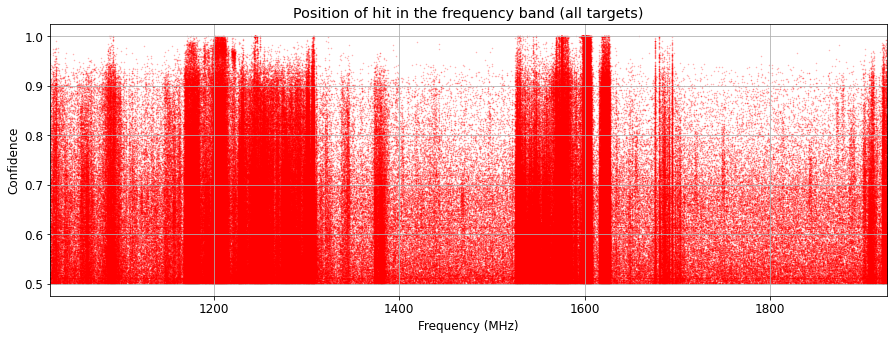

In [23]:
plot_all_hits(all_targets)

plt.gcf().set_size_inches(15, 5)    
plt.show()

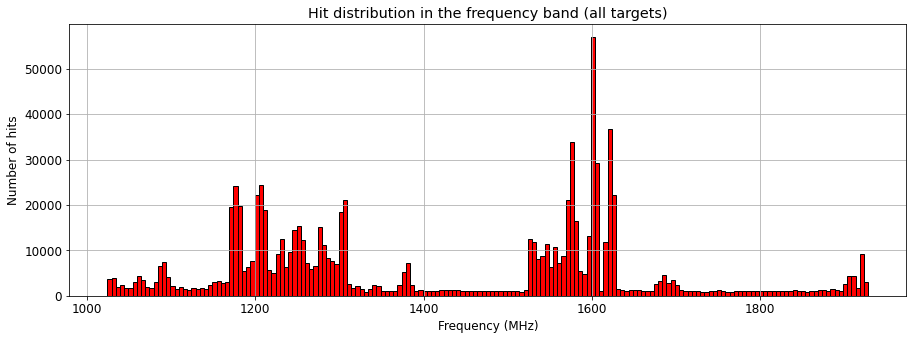

In [24]:
hist_all_hits(all_targets)

plt.gcf().set_size_inches(15, 5)    
plt.show()

In [25]:
def plot_everything(this_hit: Hit, targets_list: List[str]):
    
    
    plt.figure(figsize = (15, 20))


    plt.subplot(grid[:3, :5])

    plt.axis('off')
    
    plt.text(0.48, 1, 'Candidate information', size=15, fontweight='bold')

    spacing = 0.072
    text = this_hit.get_text(targets_list)

    for n, line in enumerate(text):
        
        if n == 0:
            plt.text(-0.05, 1 - spacing * (n + 2), line[0], size=13.5)
            plt.text(0.09, 1 - spacing * (n + 2), line[1], size=13.5, fontweight='bold')
            plt.text(0.55, 1 - spacing * (n + 2), line[2], size=13.5)

        else:
            plt.text(-0.05, 1 - spacing * (n + 2), line[0], size=13.5)
            if 'Hit' in line[1]:
                plt.text(0.55, 1 - spacing * (n + 2), line[1], size=13.5, fontweight='bold')
            else:
                plt.text(0.55, 1 - spacing * (n + 2), line[1], size=13.5)


    plt.subplot(grid[:3, 5])
    QR = this_hit.generate_QR(targets_list)
    plt.imshow(QR, cmap='gray')
    plt.axis('off')
    
    plt.subplot(grid[3:5, :3])
    plot_highlighted_hist(this_hit.target)


    plt.subplot(grid[3:5, 3:])
    this_hit.make_plot()


    diff = this_hit.end_freq - this_hit.start_freq
    start = this_hit.start_freq #- diff
    stop = this_hit.end_freq #+ diff
    mid = (start + stop) / 2

    make_waterfall_plots(filenames_list=this_hit.target.cadence, target=this_hit.target.name, 
                         f_start=start, f_stop=stop, correction_in=mid)

    #plt.show()

In [26]:
def plot_from_ID(targets_list: List[str]):
    
    ID = input('Enter Candidate ID (two numbers separated by a dash): ')
    i = int(ID.split('-')[0]) - 1
    j = int(ID.split('-')[1]) - 1
    
    input_target = Target(targets_list[i])
    input_hit = Hit(input_target, j)

    plot_everything(input_hit, targets_list)

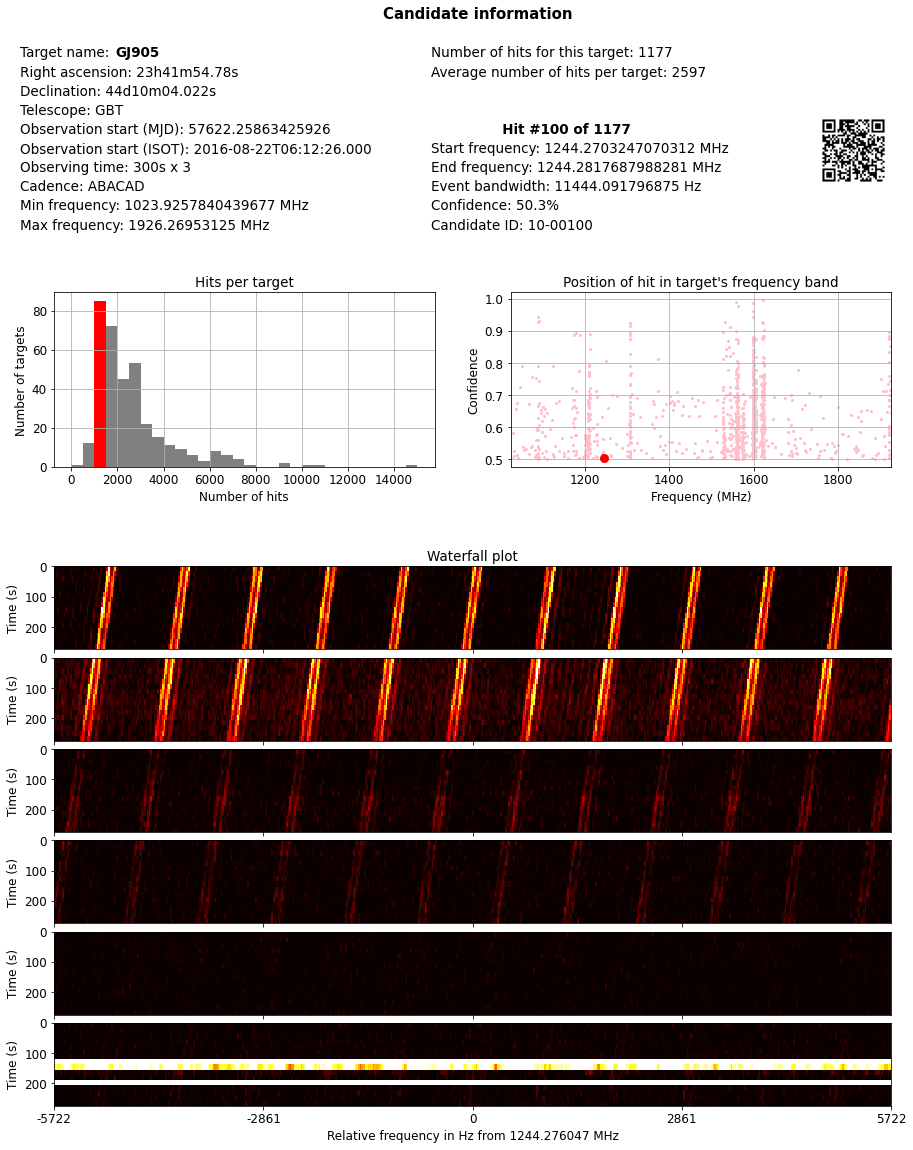

In [27]:
i = 9
j = 99

target = Target(all_targets[i])
hit = Hit(target, j)

plot_everything(hit, all_targets)

Enter Candidate ID (two numbers separated by a dash): 10-100


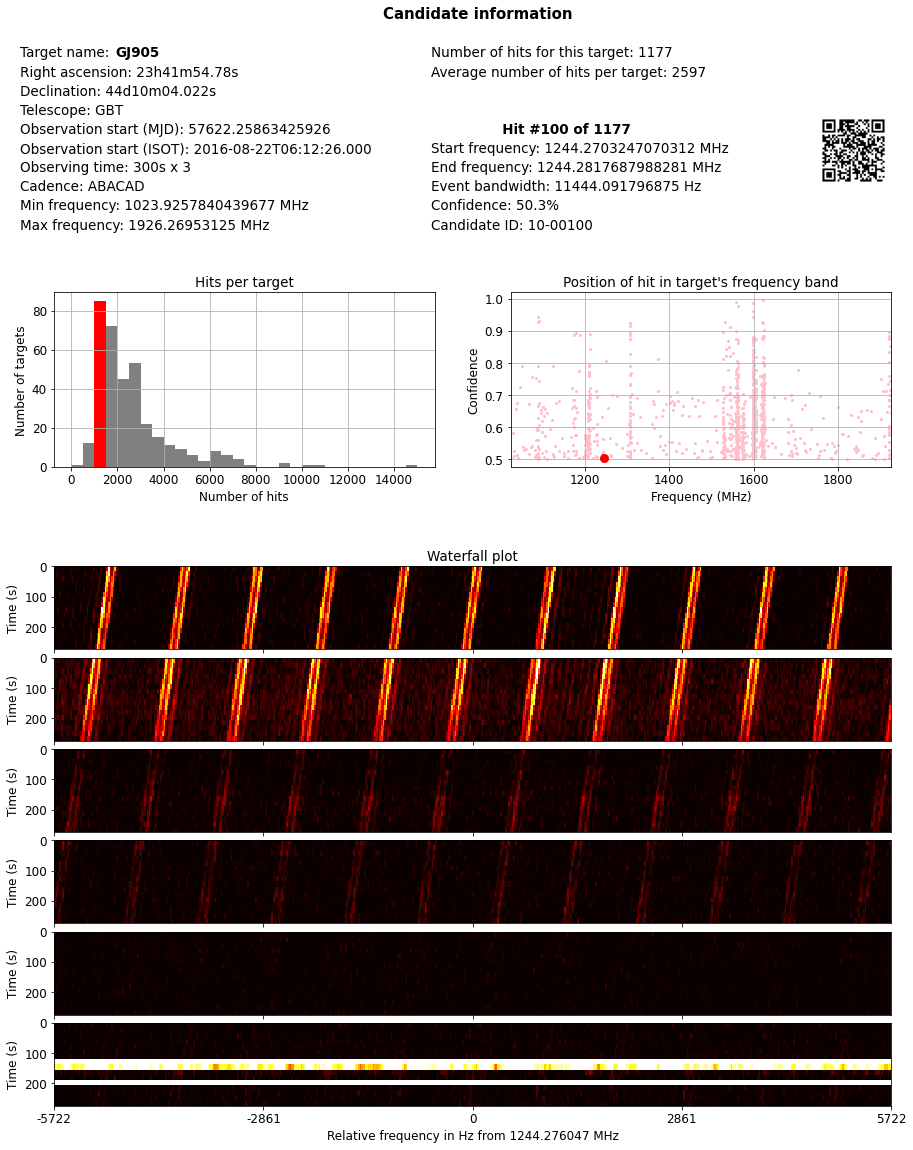

In [28]:
plot_from_ID(all_targets)

In [29]:
# To pick a target, redefine i or directly define target as the corresponding string:
i = 1
target = Target(all_targets[i])
#target = Target('HIP2')

In [30]:
target.num_hits

4390

In [31]:
tab = ' ' * (10 - len('Hit index'))
j_list = []

print('Hit index', tab, 'Probability')
for j in range(len(target.hits)):
    if target.hits[j][2] > 0.9:
        tab = ' ' * (10 - len(str(j)))
        j_list.append(j)
        print(j, tab, target.hits[j][2])
print('\nlen =', len(j_list))

Hit index   Probability
10          0.928
116         0.902
193         0.926
194         0.946
219         0.907
220         0.933
254         0.92
257         0.934
288         0.916
328         0.923
1080        0.952
1393        0.948
1395        0.975
1399        0.918
1402        0.903
1406        0.923
1444        0.954
1446        0.975
1654        0.921
1821        0.962
1823        0.951
1824        0.93
1830        0.901
1867        0.944
1871        0.956
1912        0.902
1946        0.965
1951        0.923
1952        0.962
2002        0.943
2127        0.912
2182        0.922
2209        0.933
2225        0.929
2325        0.94
2453        0.912
2609        0.924
2770        0.921
2773        0.926
2806        0.907
2807        0.902
2809        0.904
2812        0.935
2814        0.932
2815        0.932
2923        0.941
2967        0.917
3127        0.981
3132        0.936
3135        0.902
3139        0.92
3172        0.904
3240        0.912
3337        0.908
3364    

In [32]:
k = 0

# To pick a hit, redefine j
j = j_list[k]
hit = Hit(target, j)

In [33]:
tab = ' ' * (16 - len('Target number'))
print('Target number', tab, 'Number of 96% hits')

k_sum = 0

for i in range(len(all_targets)):
    target = Target(all_targets[i])
    
    k = 0
    for j in range(len(target.hits)):
        if target.hits[j][2] > 0.96:
            k += 1
            k_sum += 1
    
    tab = ' ' * (16 - len(str(i + 1)))
    print(i + 1, tab, k)

print('\nTotal number of 96% hits:', k_sum)

Target number     Number of 96% hits
1                 64
2                 12
3                 4
4                 13
5                 9
6                 2
7                 16
8                 6
9                 25
10                5
11                10
12                29
13                16
14                4
15                19
16                1
17                26
18                0
19                6
20                25
21                16
22                9
23                9
24                3
25                29
26                39
27                4
28                5
29                21
30                8
31                8
32                17
33                30
34                3
35                5
36                8
37                0
38                71
39                9
40                1
41                8
42                5
43                12
44                8
45                3
46                6
47                3
48  

In [34]:
# progress = 0

# for target_name in all_targets:
#     target = Target(target_name)
    
#     for j in range(len(target.hits)):
#         if target.hits[j][2] > 0.96:
#             hit = Hit(target, j)
        
#             ID = hit.get_ID(all_targets)
#             start = hit.start_freq
#             stop = hit.end_freq
#             mid = (start + stop) / 2

#             make_waterfall_plots_full(filenames_list=target.cadence, target=target.name, 
#                                       f_start=start, f_stop=stop, correction_in=mid)

#             plt.suptitle('Candidate ' + ID)
#             plt.gcf().set_size_inches(12, 6)    
#             plt.savefig('../Documents/waterfall_plots_BLPC1/candidate-' + ID)
#             plt.close()

#             progress += 1
#             print(progress, '/', k_sum, 'complete.')

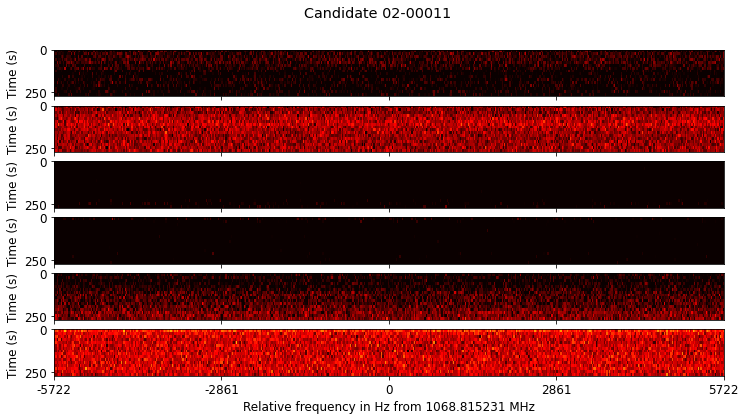

In [35]:
diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots_full(filenames_list=target.cadence, target=target.name, 
                          f_start=start, f_stop=stop, correction_in=mid)

plt.suptitle('Candidate ' + hit.get_ID(all_targets))
plt.gcf().set_size_inches(12, 6)  
plt.show()

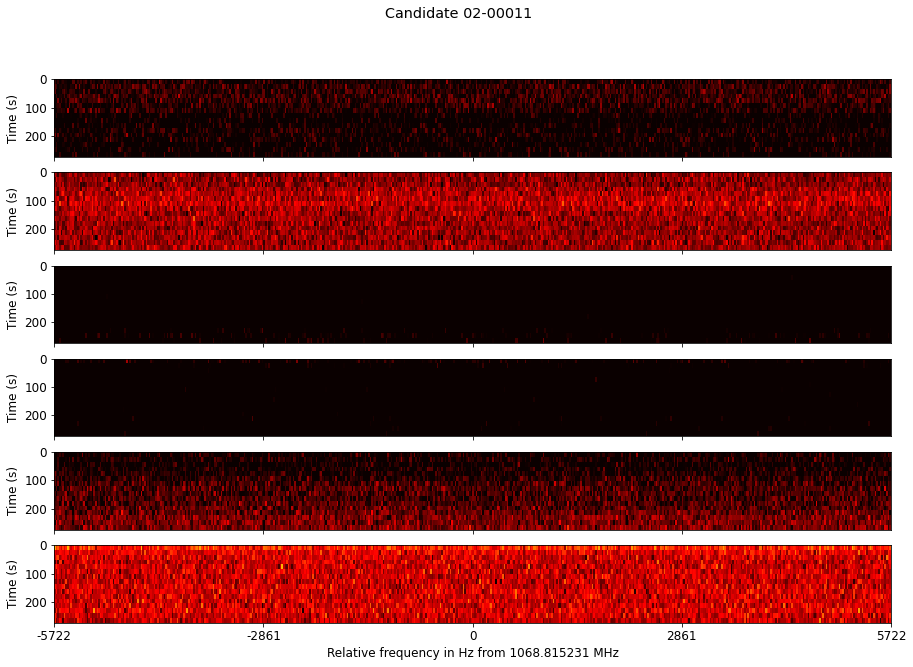

In [36]:
diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots_full(filenames_list=target.cadence, target=target.name, 
                          f_start=start, f_stop=stop, correction_in=mid)

plt.suptitle('Candidate ' + hit.get_ID(all_targets))
plt.gcf().set_size_inches(15, 10)    
plt.show()

					Candidate information

Target name: GJ412B                                   Number of hits for this target: 1622
Right ascension: 11h05m23.776s                        Average number of hits per target: 2597
Declination: 43d31m32.035s
Telescope: GBT
Observation start (MJD): 57636.73405092592            		Hit #1418 of 1622
Observation start (ISOT): 2016-09-05T17:37:02.000     Start frequency: 1604.4158935546875 MHz
Observing time: 300s x 3                              End frequency: 1604.4273376464844 MHz
Cadence: ABACAD                                       Event bandwidth: 11444.091796875 Hz
Min frequency: 1023.9257840439677 MHz                 Confidence: 67.7%
Max frequency: 1926.26953125 MHz                      Candidate ID: 05-01418


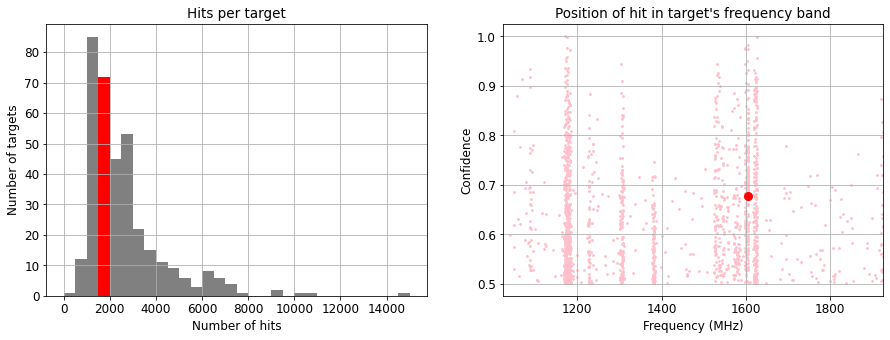

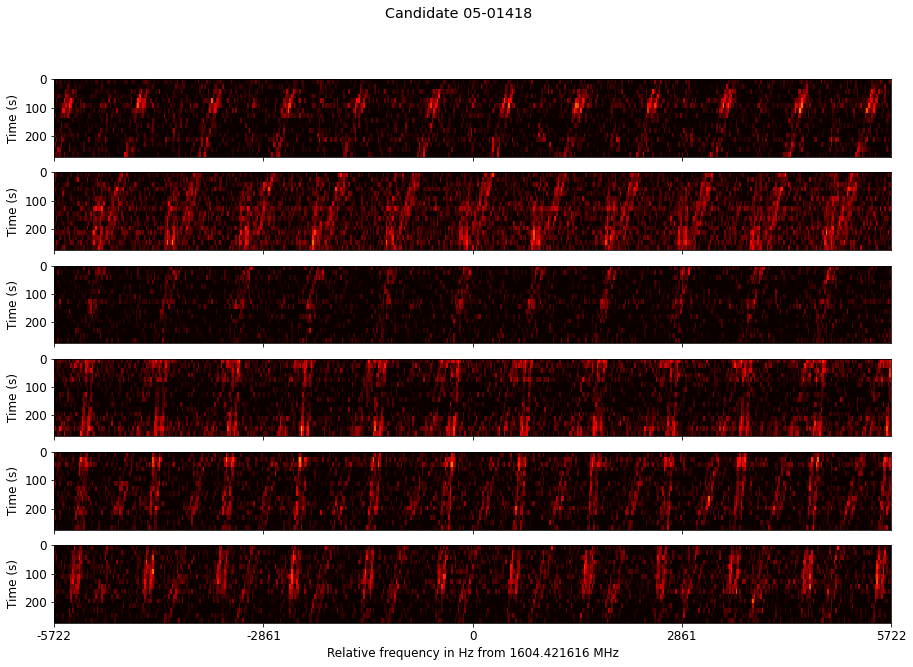

In [37]:
i = 4
j = 1417

target = Target(all_targets[i])
hit = Hit(target, j)

print('\t\t\t\t\tCandidate information\n')

hit.print_info(all_targets)


plt.subplot(1, 2, 1)
plot_highlighted_hist(target)

plt.subplot(1, 2, 2)
hit.make_plot()

plt.gcf().set_size_inches(15, 5)    
plt.show()


diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots_full(filenames_list=target.cadence, target=target.name, 
                          f_start=start, f_stop=stop, correction_in=mid)

plt.suptitle('Candidate ' + hit.get_ID(all_targets))
plt.gcf().set_size_inches(15, 10)    
plt.show()

In [38]:
i = 45
j = 1816

target = Target(all_targets[i])
hit = Hit(target, j)

print('\t\t\t\t\tCandidate information\n')

hit.print_info(all_targets)


plt.subplot(1, 2, 1)
plot_highlighted_hist(target)

plt.subplot(1, 2, 2)
hit.make_plot()

plt.gcf().set_size_inches(15, 5)    
plt.show()


diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots_full(filenames_list=target.cadence, target=target.name, 
                          f_start=start, f_stop=stop, correction_in=mid)

plt.suptitle('Candidate ' + hit.get_ID(all_targets))
plt.gcf().set_size_inches(15, 10)    
plt.show()

IndexError: list index out of range

In [ ]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info(all_targets)


diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 12)    
plt.show()

In [ ]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info(all_targets)


diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid, 
                     line1=hit.start_freq, line2=hit.end_freq)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 12)    
plt.show()

In [ ]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info(all_targets)


diff = hit.end_freq - hit.start_freq

start = hit.start_freq - diff
stop = hit.end_freq + diff
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid, 
                     line1=hit.start_freq, line2=hit.end_freq)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 12)    
plt.show()